# Modeling

## K-Means Clustering

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore")

In [2]:
first = pd.read_csv('../data/first_df.csv')

first.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,weight_pounds,height_inches,bmi,bmr,bmi category
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,0.138520,1.000000,0.089692,apple watch,Lying,144.182148,66.141768,23.169423,1760.20753,Normal Weight
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,0.137967,1.000000,0.102088,apple watch,Lying,144.182148,66.141768,23.169423,1760.20753,Normal Weight
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,0.138587,1.000000,0.115287,apple watch,Lying,144.182148,66.141768,23.169423,1760.20753,Normal Weight
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,...,0.139208,1.000000,0.129286,apple watch,Lying,144.182148,66.141768,23.169423,1760.20753,Normal Weight
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,...,0.139828,0.241567,0.144088,apple watch,Lying,144.182148,66.141768,23.169423,1760.20753,Normal Weight


In [3]:
# creating new dataframe that only contain 'bmi' and 'bmr'

quad = pd.DataFrame(first, columns = ['bmi', 'bmr'])
quad.head()

,bmi,bmr
0,23.169423,1760.20753
1,23.169423,1760.20753
2,23.169423,1760.20753
3,23.169423,1760.20753
4,23.169423,1760.20753


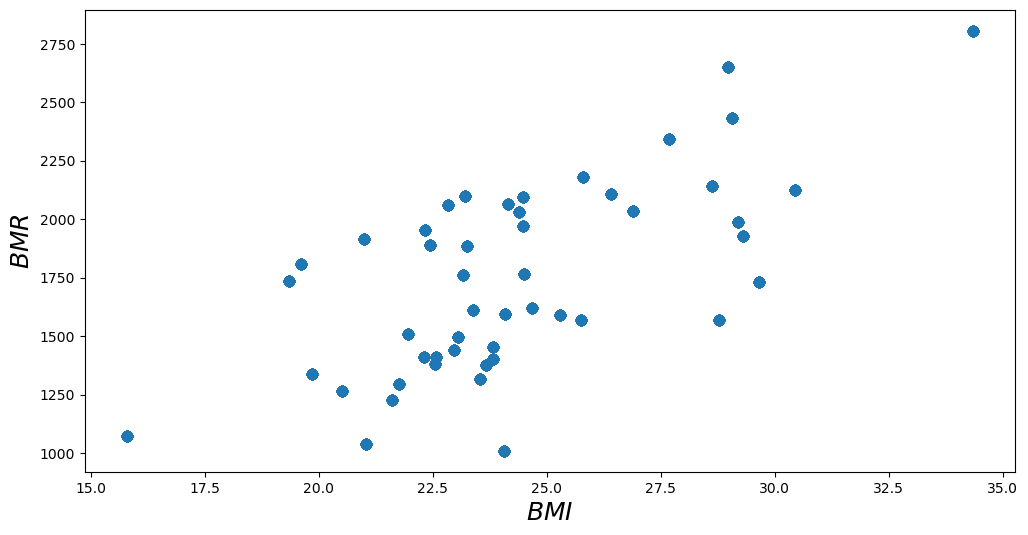

In [4]:
# initial scatter plot without clusters

quad.plot(kind = 'scatter', x = 'bmi', y = 'bmr', figsize=(12,6), s=50)
plt.xlabel("$BMI$", fontsize=18)
plt.ylabel("$BMR$", fontsize=18);

In [5]:
# Define X
X = quad[['bmi', 'bmr']]

In [6]:
# Scale the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [7]:
# instantiating and setting number of clusters to four because we have four weight classes

km = KMeans(n_clusters=4, random_state=42)

km.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [8]:
km.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [9]:
km.predict(X_scaled)

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [10]:
quad['cluster'] = km.labels_

quad.tail()

,bmi,bmr,cluster
6259,28.780155,1570.648102,2
6260,28.780155,1570.648102,2
6261,28.780155,1570.648102,2
6262,28.780155,1570.648102,2
6263,28.780155,1570.648102,2


## Centroids

In [11]:
quad['cluster'] = km.labels_

In [12]:
# finding the centroids of each cluster

quad.groupby('cluster').mean()

,bmi,bmr
cluster,,
0,23.166018,1396.529216
1,23.463525,1964.499174
2,28.966493,2121.273153
3,19.053985,1451.032509


In [13]:
km.cluster_centers_

array([[-0.26707978, -0.85732349],
       [-0.17613257,  0.62674112],
       [ 1.50611263,  1.03638023],
       [-1.52411911, -0.71491031]])

In [14]:
centroids = sc.inverse_transform(km.cluster_centers_)

In [15]:
centroids = pd.DataFrame(centroids,
                        columns = ['bmi', 'bmr'])

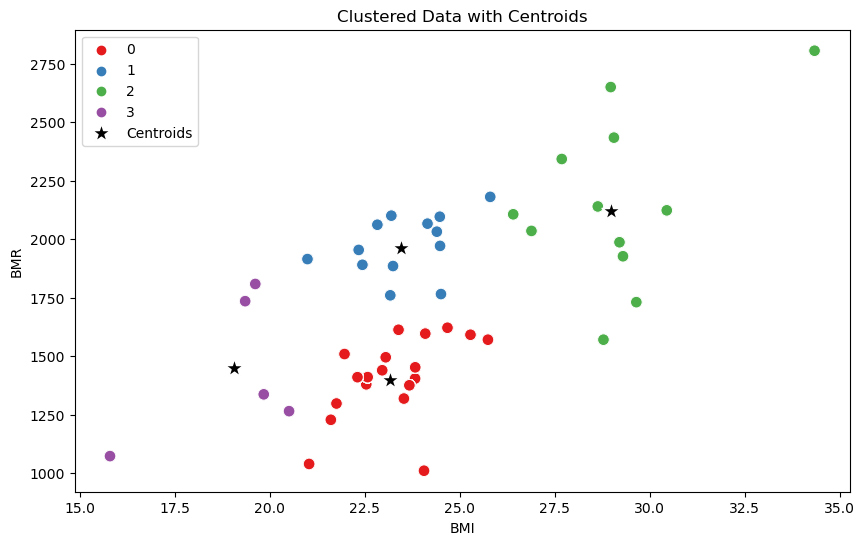

In [16]:
# Scatter plot with centroids and assigned clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='bmr', data=quad, hue='cluster', palette='Set1', s=70)

# Plot centroids
sns.scatterplot(x='bmi', y='bmr', data=centroids, color='black', marker='*', s=200, label='Centroids')

plt.title('Clustered Data with Centroids')
plt.xlabel('BMI')
plt.ylabel('BMR')
plt.legend()
plt.show()


***Above graph shows purple being our underweight category, with red being normal, blue being overweight, and green being obese. It looks like the clusters were not fully separated, giving us different values than the original dataset assigned.***

In [17]:
#These are NOT dense clusters. Remember lower is better!
km.inertia_

3075.4620037320933

In [18]:
# Not a high silhoutte score either so the points within the clusters aren't even near eachother.
silhouette_score(X_scaled, km.labels_)

0.45855163623285855

## Elbow Plot

In [19]:
# creating a for loop to find the best k value

inertia_list = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[12527.999999999976,
 5965.662390017391,
 3802.4747805730976,
 3075.4620037320933,
 2473.8678531176893,
 1974.2277905561564,
 1515.0105013896348,
 1275.991301244205,
 1043.08918386145]

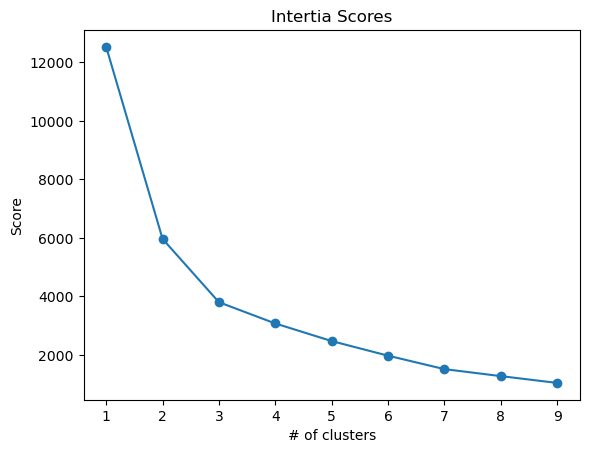

In [20]:
plt.plot(range(1, 10), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Score')
plt.title('Intertia Scores');

***Above graph shows us that 3 would be the best value for K cluster wise.***

## Finding Best K With Silhouette Graph.

In [21]:
# creating a for loop to find the best k value

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
    
silhouette_list

[0.47166110686879464,
 0.45478923715975855,
 0.45855163623285855,
 0.4662963889402856,
 0.47752974379932783,
 0.5018552312623038,
 0.5109010087866199,
 0.5152451791023601,
 0.5316092839155486]

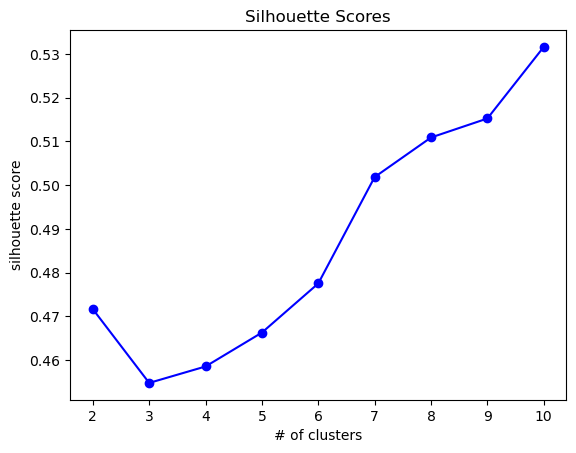

In [22]:
plt.plot(range(2, 11), silhouette_list, marker = 'o', color = 'blue')
plt.xlabel('# of clusters')
plt.ylabel('silhouette score')
plt.title('Silhouette Scores');

***Above graph confirms best value of K is 3.***

## DBSCAN

In [23]:
first.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,weight_pounds,height_inches,bmi,bmr,bmi category
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,0.138520,1.000000,0.089692,apple watch,Lying,144.182148,66.141768,23.169423,1760.20753,Normal Weight
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,0.137967,1.000000,0.102088,apple watch,Lying,144.182148,66.141768,23.169423,1760.20753,Normal Weight
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,0.138587,1.000000,0.115287,apple watch,Lying,144.182148,66.141768,23.169423,1760.20753,Normal Weight
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,...,0.139208,1.000000,0.129286,apple watch,Lying,144.182148,66.141768,23.169423,1760.20753,Normal Weight
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,...,0.139828,0.241567,0.144088,apple watch,Lying,144.182148,66.141768,23.169423,1760.20753,Normal Weight


In [24]:
scan = pd.DataFrame(first, columns = ['bmi', 'bmr'])

In [25]:
ss = StandardScaler()

X_scaled = ss.fit_transform(scan)

In [26]:
dbscan = DBSCAN()

dbscan.fit(X_scaled);

In [27]:
dbscan.labels_

array([0, 0, 0, ..., 4, 4, 4])

In [28]:
#This is going to be even worse.
silhouette_score(X_scaled, dbscan.labels_)

0.22317957724637139

In [29]:
# Create cluster column
scan['cluster'] = dbscan.labels_

scan.head()

,bmi,bmr,cluster
0,23.169423,1760.20753,0
1,23.169423,1760.20753,0
2,23.169423,1760.20753,0
3,23.169423,1760.20753,0
4,23.169423,1760.20753,0


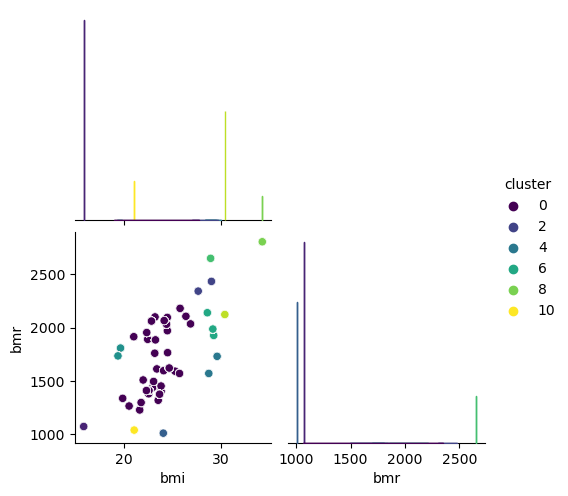

In [30]:
# Pairplot
sns.pairplot(scan,
            hue = 'cluster',
            corner = True,
            palette = 'viridis');

***Above pairplot is giving us 6 columns per base epsilon.***

In [31]:
scan.cluster.value_counts(normalize = True)

0     0.706258
6     0.067209
5     0.050128
2     0.037995
4     0.036558
3     0.024266
1     0.023308
10    0.015006
9     0.014049
8     0.012931
7     0.012292
Name: cluster, dtype: float64

## Change the Value of Epsilon.

In [32]:
dbscan = DBSCAN(eps=.9)

dbscan.fit(X_scaled)

DBSCAN(eps=0.9)

In [33]:
pd.Series(dbscan.labels_).unique()

array([0, 1, 2])

In [34]:
silhouette_score(X_scaled, dbscan.labels_)

0.39193466658557996

***By changing the value of epsilon, we noticed a spike in our silhouette score, but the model is still performing poorly.***

In [35]:
scan['cluster'] = dbscan.labels_

scan.cluster.value_counts(normalize=True)

0    0.963761
1    0.023308
2    0.012931
Name: cluster, dtype: float64

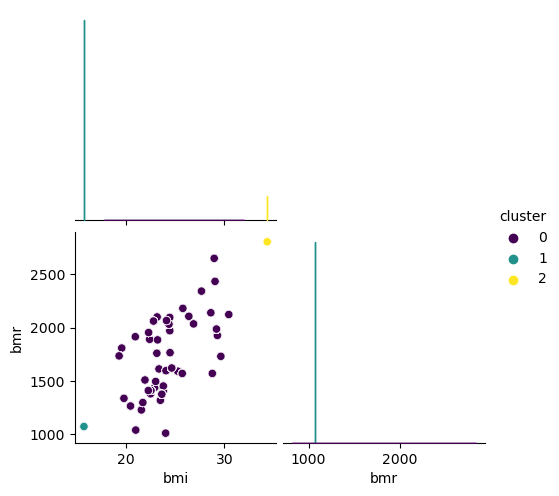

In [36]:
sns.pairplot(scan,
            hue = 'cluster',
            palette = 'viridis',
            corner = True);

***After changing our epsilon value, we now have 3 columns.***

## Random Forests

In [37]:
X = first.drop(columns=["activity", "weight_pounds", "height_inches", "bmi", "bmr",'bmi category'])

X_encoded = pd.get_dummies(X, columns=["device"], drop_first=True)

y = first["activity"]

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate accuracy
model.score()
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [38]:
model.score(X_train, y_train)

1.0

***Our predicted accuracy shows that our model is performing well at predicting activity type for users based on their fitness and health data.***